In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [ ]:
loan= pd.read_csv('loan-train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [ ]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    loan[col].fillna(loan[col].mode()[0],inplace=True)

# in Nnumeric variables, replcase nulls with mean values of each variable
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

In [ ]:
loan.isnull().values.sum()

0

In [ ]:
#drop LoanID
loan.drop('Loan_ID', axis = 1, inplace=True)

KeyError: "['Loan_ID'] not found in axis"

In [ ]:
# Assigning numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loan['Gender'] = labelencoder.fit_transform(loan['Gender'])
loan['Married'] = labelencoder.fit_transform(loan['Married'])
loan['Dependents'] = labelencoder.fit_transform(loan['Dependents'])
loan['Education'] = labelencoder.fit_transform(loan['Education'])
loan['Self_Employed'] = labelencoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = labelencoder.fit_transform(loan['Loan_Status'])

loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


## Variable Correlations-Heatmap

In [ ]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,TotalApplicantIncome_log,LoanAmount_log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987,0.093191,0.167285,0.144378
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478,0.083319,0.151527,0.180178
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118,0.125590,0.112812,0.156391
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884,-0.161362,-0.204861,-0.143367
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700,0.113000,0.176709,0.109629
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710,0.893037,0.717829,0.434849
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187,0.342781,0.383827,0.204179
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416,0.620102,0.687552,0.895324
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549,-0.070917,-0.056044,0.084616
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556,-0.012563,0.020791,-0.019542


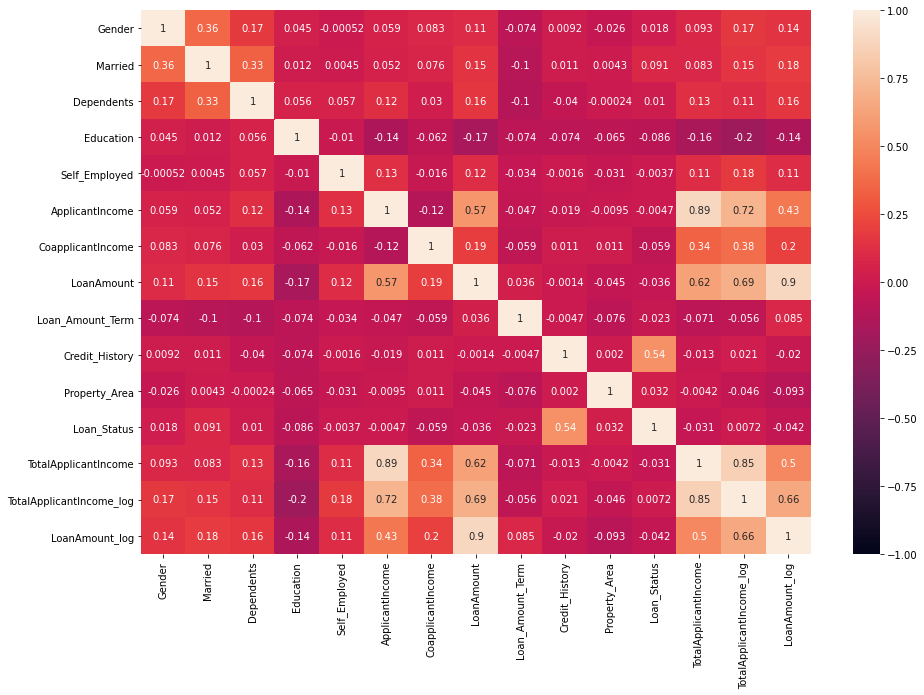

In [ ]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(loan.corr(), vmin=-1, vmax=1, annot=True) 

# Logistic Regression with outliers and skewness

In [ ]:
from sklearn .model_selection import train_test_split
X=loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 11), (185, 11))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model = sm.Logit(y_train, X_train).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.481682
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.239     
Dependent Variable: Loan_Status      AIC:              435.2828  
Date:               2021-11-19 11:56 BIC:              479.9589  
No. Observations:   429              Log-Likelihood:   -206.64   
Df Model:           10               LL-Null:          -271.66   
Df Residuals:       418              LLR p-value:      4.6023e-23
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.1681   0.3466 -0.4850 0.6276 -0.8475  0.5113
Married            0.3042   0.2921  1.0412 0.2978 -0.2684  0.8768


In [ ]:
logit_model.pvalues < 0.05
#'Education','CoapplicantIncome','Loan_Amount_Term','Credit_History'

Gender               False
Married              False
Dependents           False
Education             True
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [ ]:
y_pred_regression = logit_model.predict(X_test)
y_pred_regression

454    0.769345
52     0.800206
536    0.700584
469    0.795795
55     0.855524
         ...   
242    0.903374
515    0.836150
582    0.861624
225    0.798735
134    0.775735
Length: 185, dtype: float64

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_regression.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

Confusion Matrix: 
 [[ 22   2]
 [ 29 132]] 

Accuracy: 0.8324324324324325 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



# Logistic Regression-Removing insignificant variables (Education, CoapplicantIncome,Loan_Amount_Term, Credit_History)

In [ ]:
from sklearn .model_selection import train_test_split
X=loan[['Education','CoapplicantIncome','Loan_Amount_Term','Credit_History']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 4), (185, 4))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_SigVar = sm.Logit(y_train, X_train).fit()
print(logit_model_SigVar.summary2())

Optimization terminated successfully.
         Current function value: 0.486811
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.231     
Dependent Variable: Loan_Status      AIC:              425.6837  
Date:               2021-11-19 12:12 BIC:              441.9295  
No. Observations:   429              Log-Likelihood:   -208.84   
Df Model:           3                LL-Null:          -271.66   
Df Residuals:       425              LLR p-value:      4.7263e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Education         -0.5985   0.2843 -2.1050 0.0353 -1.1558 -0.0412
CoapplicantIncome -0.0001   0.0000 -2.2803 0.0226 -0.0002 -0.0000


In [ ]:
logit_model_SigVar.pvalues < 0.05

Education            True
CoapplicantIncome    True
Loan_Amount_Term     True
Credit_History       True
dtype: bool

In [ ]:
y_pred_SigVar = logit_model_SigVar.predict(X_test)
y_pred_SigVar

454    0.815248
52     0.815248
536    0.757135
469    0.780136
55     0.799099
         ...   
242    0.927458
515    0.764868
582    0.815248
225    0.815248
134    0.815248
Length: 185, dtype: float64

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_SigVar.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

Confusion Matrix: 
 [[ 22   2]
 [ 29 132]] 

Accuracy: 0.8324324324324325 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



**--> The accuracy did not improve after remmoving the insignificant variables.**

# Logistic Regression without outliers

Since there is noise the data and the data is skewed to the right, we perform below two corrective actions:
1. Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data
2. Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

## Method1: Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data

In [ ]:
#Remove outlier customers with outlying ApplicantIncome (above $30000 i.e. 7 customers)
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].count())
#plt.hist(loan['ApplicantIncome'][loan['ApplicantIncome']<30000], bins=10)

#Remove outlier customers with outlying CoaaplicantIncome (above $15000 i.e. 4 customers)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].count())
#plt.hist(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000], bins=10)

#Remove outlier customers with outlying loan amount (above $500 i.e. 5 customers)
print(loan['LoanAmount'][loan['LoanAmount']>500].count())
#plt.hist(loan['LoanAmount'][loan['LoanAmount']<500], bins=10)

7
4
5


In [ ]:
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].index)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].index)
print(loan['LoanAmount'][loan['LoanAmount']>500].index)

Int64Index([155, 171, 183, 185, 333, 409, 443], dtype='int64')
Int64Index([402, 417, 581, 600], dtype='int64')
Int64Index([130, 155, 171, 369, 561], dtype='int64')


In [ ]:
#Create dataset without outliers - drop rows 
loan_noOutliers = loan.copy()
loan_noOutliers.drop(loan_noOutliers['ApplicantIncome'][loan_noOutliers['ApplicantIncome']>30000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['CoapplicantIncome'][loan_noOutliers['CoapplicantIncome']>15000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['LoanAmount'][loan_noOutliers['LoanAmount']>500].index, inplace=True)

In [ ]:
loan_noOutliers.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
## Logistic Regression without outliers and skewness-droppinng outliers (method1)

In [ ]:
#Logistic Regression- Without outliers- method2: using log function
X=loan_noOutliers[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan_noOutliers[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((420, 11), (180, 11))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_DropOutliers = sm.Logit(y_train, X_train).fit()
print(logit_model_DropOutliers.summary2())

Optimization terminated successfully.
         Current function value: 0.453800
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.260     
Dependent Variable: Loan_Status      AIC:              403.1921  
Date:               2021-11-19 12:20 BIC:              447.6349  
No. Observations:   420              Log-Likelihood:   -190.60   
Df Model:           10               LL-Null:          -257.40   
Df Residuals:       409              LLR p-value:      8.5290e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.1764   0.3601 -0.4900 0.6242 -0.8822  0.5293
Married            0.3841   0.3132  1.2266 0.2200 -0.2297  0.9979


In [ ]:
logit_model_DropOutliers.pvalues < 0.05

Gender               False
Married              False
Dependents           False
Education             True
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [ ]:
y_pred_DropOutliers = logit_model_DropOutliers.predict(X_test)
y_pred_DropOutliers

445    0.872449
122    0.095896
229    0.776698
490    0.655975
210    0.741661
         ...   
254    0.051346
363    0.879881
466    0.152571
504    0.773033
135    0.798457
Length: 180, dtype: float64

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_DropOutliers.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

Confusion Matrix: 
 [[ 25   3]
 [ 34 118]] 

Accuracy: 0.7944444444444444 

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.42      0.57        59
           1       0.78      0.98      0.86       121

    accuracy                           0.79       180
   macro avg       0.83      0.70      0.72       180
weighted avg       0.81      0.79      0.77       180



## Logistic Regression-Removing insignificant variables 

In [ ]:
from sklearn .model_selection import train_test_split
X=loan[['Education','Loan_Amount_Term','Credit_History']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 3), (185, 3))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_DropOutliers = sm.Logit(y_train, X_train).fit()
print(logit_model_DropOutliers.summary2())

Optimization terminated successfully.
         Current function value: 0.493474
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.221     
Dependent Variable: Loan_Status      AIC:              429.4010  
Date:               2021-11-19 12:23 BIC:              441.5854  
No. Observations:   429              Log-Likelihood:   -211.70   
Df Model:           2                LL-Null:          -271.66   
Df Residuals:       426              LLR p-value:      9.1435e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Education         -0.5561   0.2815 -1.9755 0.0482 -1.1079 -0.0044
Loan_Amount_Term  -0.0054   0.0010 -5.1765 0.0000 -0.0074 -0.0033


In [ ]:
logit_model_DropOutliers.pvalues < 0.05

Education           True
Loan_Amount_Term    True
Credit_History      True
dtype: bool

In [ ]:
y_pred_DropOutliers = logit_model_DropOutliers.predict(X_test)
y_pred_DropOutliers

454    0.788540
52     0.788540
536    0.788540
469    0.788540
55     0.788540
         ...   
242    0.949176
515    0.788540
582    0.788540
225    0.788540
134    0.788540
Length: 185, dtype: float64

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_DropOutliers.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

Confusion Matrix: 
 [[ 21   2]
 [ 30 132]] 

Accuracy: 0.827027027027027 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



# Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

In [ ]:
#Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

loan['TotalApplicantIncome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalApplicantIncome']

# applying log function on TotalApplicantIncome & LoanAmount_log
loan['TotalApplicantIncome_log']=np.log(loan['TotalApplicantIncome'])    
loan['LoanAmount_log']=np.log(loan['LoanAmount'])

In [ ]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,TotalApplicantIncome_log,LoanAmount_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.986426
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323,4.787492
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,4.948760


<AxesSubplot:>

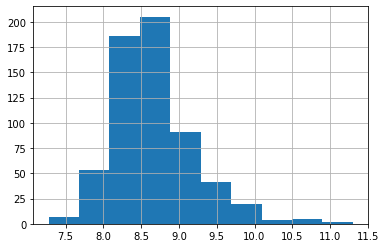

In [ ]:
loan['TotalApplicantIncome_log'].hist(bins=10) 

<AxesSubplot:>

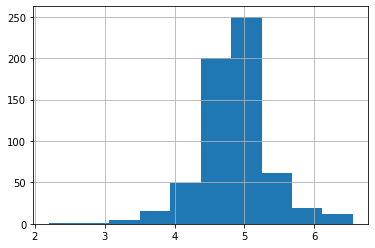

In [ ]:
loan['LoanAmount_log'].hist(bins=10)

## Logistic Regression without outliers and skewness-log function normalization (method 2)

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalApplicantIncome', 'TotalApplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [ ]:
#Logistic Regression- Without outliers- method2: using log function
X=loan[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','TotalApplicantIncome_log', 'LoanAmount_log','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 10), (185, 10))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_nOutliers_Log = sm.Logit(y_train, X_train).fit()
print(logit_model_nOutliers_Log.summary2())

Optimization terminated successfully.
         Current function value: 0.476170
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.248     
Dependent Variable:    Loan_Status        AIC:                428.5537  
Date:                  2021-11-19 12:32   BIC:                469.1683  
No. Observations:      429                Log-Likelihood:     -204.28   
Df Model:              9                  LL-Null:            -271.66   
Df Residuals:          419                LLR p-value:        1.2419e-24
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Gender                    0.0459   0.3482  0.1319 0

In [ ]:
logit_model_nOutliers_Log.pvalues < 0.05

Gender                      False
Married                     False
Dependents                  False
Education                    True
Self_Employed               False
Loan_Amount_Term            False
TotalApplicantIncome_log    False
LoanAmount_log              False
Credit_History               True
Property_Area               False
dtype: bool

In [ ]:
y_pred_nOutliers_Log = logit_model_nOutliers_Log.predict(X_test)
y_pred_nOutliers_Log

454    0.780714
52     0.739180
536    0.720965
469    0.836696
55     0.879644
         ...   
242    0.729521
515    0.860828
582    0.898976
225    0.756327
134    0.759970
Length: 185, dtype: float64

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_nOutliers_Log.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

Confusion Matrix: 
 [[ 21   2]
 [ 30 132]] 

Accuracy: 0.827027027027027 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



## Logistic Regression-Removing insignificant variables 

In [ ]:
X=loan[['Education','Credit_History']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 2), (185, 2))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_nOutliers_Log = sm.Logit(y_train, X_train).fit()
print(logit_model_nOutliers_Log.summary2())

Optimization terminated successfully.
         Current function value: 0.539861
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.147     
Dependent Variable: Loan_Status      AIC:              467.2009  
Date:               2021-11-19 12:35 BIC:              475.3238  
No. Observations:   429              Log-Likelihood:   -231.60   
Df Model:           1                LL-Null:          -271.66   
Df Residuals:       427              LLR p-value:      3.5349e-19
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Education         -0.8364   0.2487 -3.3628 0.0008 -1.3239 -0.3489
Credit_History     1.4648   0.1454 10.0745 0.0000  1.1798  1.7497


In [ ]:
logit_model_nOutliers_Log.pvalues < 0.05

Education         True
Credit_History    True
dtype: bool

In [ ]:
y_pred_nOutliers_Log = logit_model_nOutliers_Log.predict(X_test)
y_pred_nOutliers_Log

454    0.812261
52     0.812261
536    0.812261
469    0.812261
55     0.812261
         ...   
242    0.812261
515    0.812261
582    0.812261
225    0.812261
134    0.812261
Length: 185, dtype: float64

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_nOutliers_Log.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

Confusion Matrix: 
 [[  7   0]
 [ 44 134]] 

Accuracy: 0.7621621621621621 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.14      0.24        51
           1       0.75      1.00      0.86       134

    accuracy                           0.76       185
   macro avg       0.88      0.57      0.55       185
weighted avg       0.82      0.76      0.69       185

